In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [32]:
df = pd.read_csv('sick.txt', skiprows = [0], names = ['sick', 'age', 'children', 'avgtemp_winter'])

In [39]:
b0_init = 1
b1_init = 0
b2_init = 0
b3_init = 0
sig_init = np.sqrt(0.01)
mu = 0

In [110]:
df.apply(pd.to_numeric)
df['error_est'] = df['sick'] - 1
df.head()

,sick,age,children,avgtemp_winter,error_est
0,1.67,57.47,3.04,54.10,0.67
1,0.71,26.77,1.20,36.54,-0.29
2,1.39,41.85,2.31,32.38,0.39
3,1.37,51.27,2.46,52.94,0.37
4,1.45,44.22,2.72,45.90,0.45


<IPython.core.display.Javascript object>


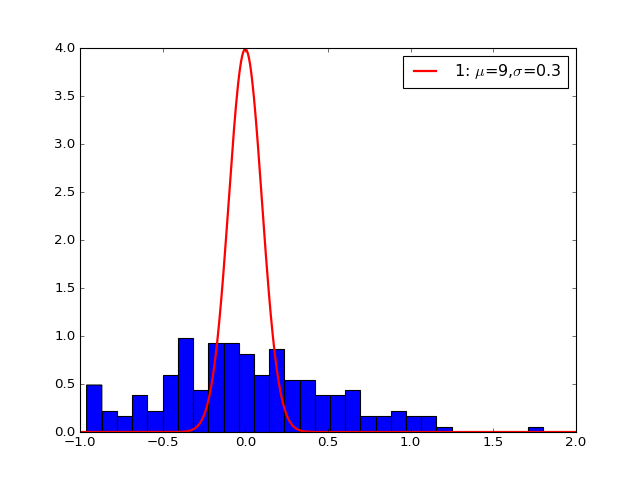

In [111]:
%matplotlib notebook 

count, bins, ignored = plt.hist(df['error_est'], 30, normed = True)


In [112]:
def norm_pdf(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the normal pdf with mean mu and standard
    deviation sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
   
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
        
    pdf_vals = (1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - mu)**2 / (2 * sigma**2)))
    
    return pdf_vals

dist_pts = np.linspace(-1, 2, 500)
#mu_init = 0
#sig_init = 
plt.plot(dist_pts, norm_pdf(dist_pts, mu, sig_init),
         linewidth=2, color='r', label='1: $\mu$=9,$\sigma$=0.3')
plt.legend(loc='upper right')

In [78]:
def log_lik_norm(data, b0, b1, b2, b3, sigma):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given normal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = the normally distributed error
    mu     = set to 0 (known)
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    b0, b1, b2, b3 = parameters
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        norm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    xvals = data['sick'] - b0 - b1*data['age'] - b2*data['children'] - b3*data['avgtemp_winter']
    pdf_vals = norm_pdf(xvals, 0, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood: ', log_lik_norm(df, b0_init, b1_init, b2_init, b3_init, sig_init))

Log-likelihood:  -2253.700688042125


In [79]:
def crit(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (5,) vector, ([b0, b1, b2, b3, sigma])
    args   = the dataframe with actual data
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    b0, b1, b2, b3, sigma = params
    df = args[0]
    log_lik_val = log_lik_norm(df, b0, b1, b2, b3, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [89]:
import scipy.optimize as opt


#Attempt to optimize using method SLSQP

mu_init = 0
params_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
mle_args = df
results = opt.minimize(crit, params_init, args=(mle_args), method = 'SLSQP')
b0_1, b1_1, b2_1, b3_1, sigma_1 = results.x
print('b0=', b0_1, 'b1=', b1_1, 'b2=', b2_1, 'b3=', b3_1, 'sigma=', sigma_1)

b0= 46.0198488659 b1= 103.89834802 b2= -82.603516994 b3= -83.0455650978 sigma= -420.918478405


In [90]:
results

     fun: -0.0
     jac: array([ 0.,  0.,  0.,  0.,  0.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 179
     nit: 23
    njev: 23
  status: 0
 success: True
       x: array([  46.01984887,  103.89834802,  -82.60351699,  -83.0455651 ,
       -420.91847841])

In [116]:
#Method SLSQP did not return the hessian. Tried Method TNC.
#TNC method also failed to terminate successfully. Method L-BFGS-B tried.

mu_init = 0
params_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
mle_args = df
results = opt.minimize(crit, params_init, args=(mle_args), method = 'L-BFGS-B')
b0_2, b1_2, b2_2, b3_2, sigma_2 = results.x
print('b0_2=', b0_2, 'b1=', b1_2, 'b2=', b2_2, 'b3=', b3_2, 'sigma=', sigma_2)

b0_2= 1.0 b1= 0.0 b2= 0.0 b3= 0.0 sigma= 0.1


In [114]:
results

     fun: -326.1251866747769
     jac: array([   207.91151769, -32418.0065661 ,  -5285.90873614,  -1892.56650742,
        -4167.81781496])
 message: 'Max. number of function evaluations reached'
    nfev: 100
     nit: 18
  status: 3
 success: False
       x: array([ 0.35671887,  0.02127464,  0.29170445, -0.01591874,  0.0334402 ])

In [100]:
hessian = results.hess_inv
hessian.todense()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [103]:
#Method L-BFGS-B gave back initial inputs, but produced the Hessian. 
#Substitute SLSQP method output into Method L-BFGS-B for third attempt to optimize

mu_init = 0
params_init = np.array([b0_1, b1_1, b2_1, b3_1, sigma_1])
mle_args = df
results = opt.minimize(crit, params_init, args=(mle_args), method = 'L-BFGS-B')
b0_3, b1_3, b2_3, b3_3, sigma_3 = results.x
print('b0_3=', b0_3, 'b1_3=', b1_3, 'b2_3=', b2_3, 'b3_3=', b3_3, 'sigma_3=', sigma_3)

b0_3= 46.0198488659 b1_3= 103.89834802 b2_3= -82.603516994 b3_3= -83.0455650978 sigma_3= -420.918478405


In [104]:
results

      fun: -0.0
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0.,  0.,  0.,  0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 0
   status: 0
  success: True
        x: array([  46.01984887,  103.89834802,  -82.60351699,  -83.0455651 ,
       -420.91847841])

In [105]:
hessian_fin = results.hess_inv
hessian_fin.todense()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [119]:
#Perform likelihood ratio test using third optimization attempt outputs

log_lik_h0 = log_lik_norm(df, b0_init, b1_init, b2_init, b3_init, sig_init)
log_lik_mle = log_lik_norm(df, b0_3, b1_3, b2_3, b3_3, sigma_3)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print(pval_h0)
print(log_lik_mle)
print(log_lik_h0)

0.0
0.0
-2253.700688042125
